## Q1

Explain the difference between:

- continued pretraining

- supervised fine-tuning (SFT)

- instruction tuning

- preference optimization (RLHF / DPO)

#### Continued pretraining

**Continued pretraining** -> extends the original self-supervised training of a foundation model on new unlabeled text using the same objective as base pretraining.

> Same loss. Same task. Different data.

Causal LM objective:

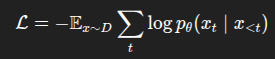

data -> unlabeled + domain-specific

what it changes? 
- Improves world knowledge in a domain
- Adjusts token statistics, syntax, jargon
- Does not teach the model to follow instructions or align with humans

when to use?
- You want a domain expert base model
- You have lots of raw text, but little annotation
- Example: “Turn LLaMA into a finance-native model”

key risks (important)

- **Catastrophic forgetting** if domain data overwhelms general data -> Requires careful data mixing

#### supervised fine tuning (SFT)

SFT : train model on: (input,output) pairs [annotated data]

SFT objective: (cross-entropy)

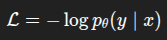

data -> (prompt, answer) , (question, solution) , (instruction, completion)

--> Typically high quality, low volume


what it does? -> Improves accuracy and consistency

> Still not strongly aligned with human preferences

when to use? -> do specific tasks well + we have expert-written answers

examples -> Code generation, Math solutions, Structured extraction

#### Instruction Tuning (a subtype of SFT)

Instruction tuning is SFT where the inputs are natural-language instructions.

examples:

> “Summarize this.”

> “Explain like I’m five.”

> “Write a secure smart contract.”

objective -> same as SFT

data:
- Instruction-response pairs
- Often multi-task, diverse, and templated


enables:
- Zero-shot generalization
- Task switching
- Conversational behavior

> This is where a base model becomes Chat-like

when to use?

- You want a general assistant
- You want the model to:
    - Follow instructions
    - Respect formats
    - Handle unseen tasks


don't forget: **Instruction tuning ≠ alignment**

#### Preference Optimization (RLHF / DPO)

-> it does not teach correctness.

-> It teaches which answers humans prefer.

> “Between these two responses, which is better?”



##### RLHF (Reinforcement Learning from Human Feedback)

pipeline:

1. Train a reward model on ranked responses

2. Optimize the LLM with RL (usually PPO)


Objective (simplified):

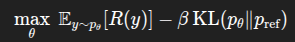

what it changes?

- Tone

- Helpfulness

- Harmlessness

- Politeness

- Refusal behavior

downsides:

- Expensive

- Unstable

- Reward hacking

- Complex infra

##### DPO (Direct Preference Optimization)

> DPO removes RL entirely and directly optimizes preferences using a contrastive loss.

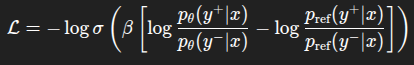

y_plus -> preferred answer

y_minus -> rejected answer

-> it is much more stable

- Widely adopted (LLaMA-2+, Mistral, Qwen)

- but it is offline (but ppo can be online)

-> If you skip step 3, the model may be correct but unpleasant.

-> If you skip step 2, it may be knowledgeable but unusable.